In [ ]:
#notes :
# adata.layers['counts'] contains raw data

In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read('annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 58015 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
right=adata[(adata.obs['location'] == 'Right')].copy()
right

AnnData object with n_obs × n_vars = 25671 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
left=adata[(adata.obs['location'] == 'Left')].copy()
left

AnnData object with n_obs × n_vars = 32344 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

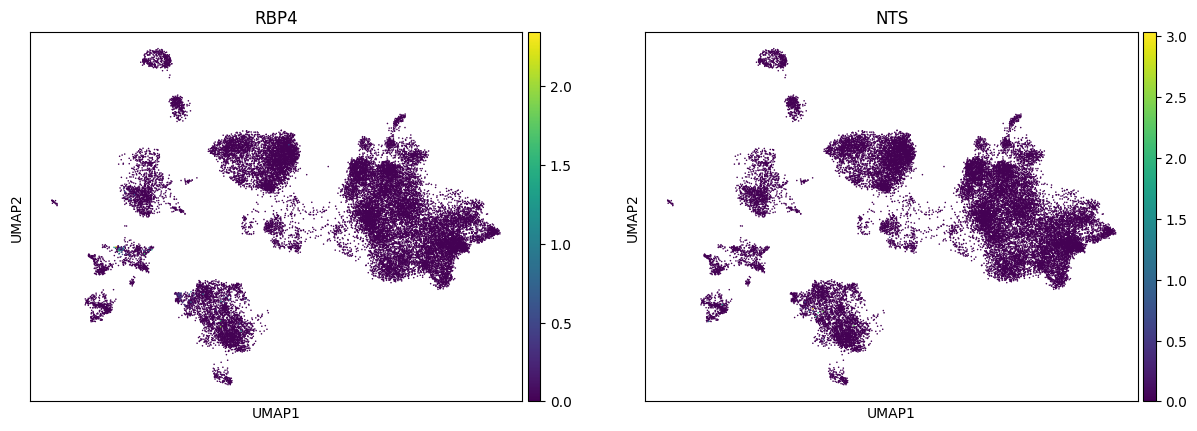

In [6]:
sc.pl.umap(right, color = ['RBP4','NTS',], legend_loc = 'on data', s = 5)

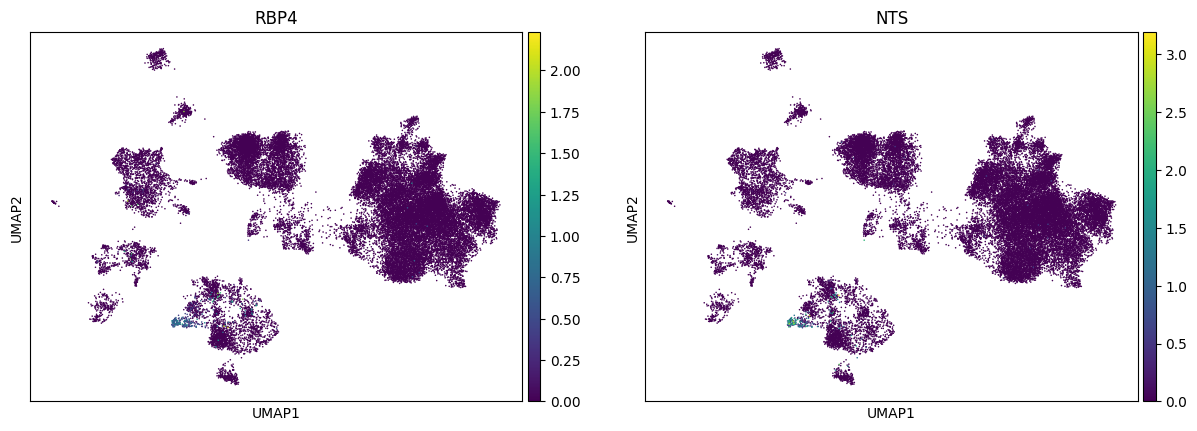

In [7]:
sc.pl.umap(left, color = ['RBP4','NTS',], legend_loc = 'on data', s = 5)

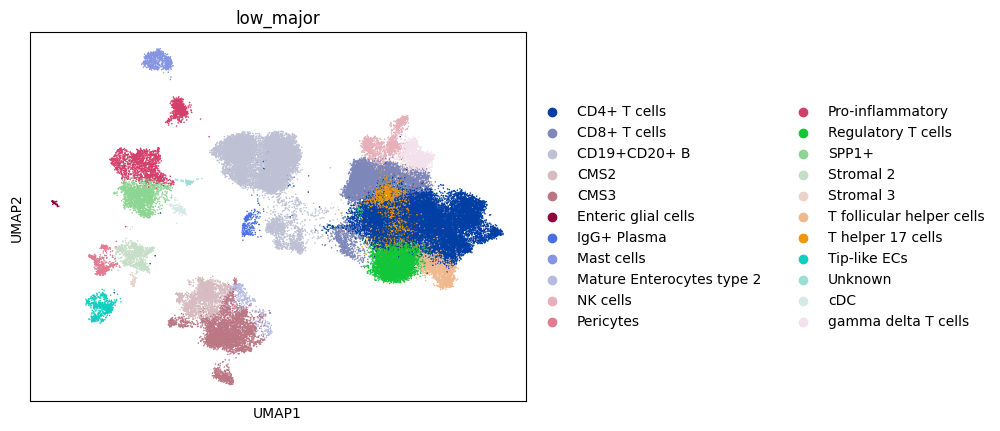

In [4]:
sc.pl.umap(adata, color = ['low_major'], s = 5)

In [5]:
sc.tl.rank_genes_groups(adata, groupby = 'overcluster')
marks = sc.get.rank_genes_groups_df(adata, group = None)

/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: Performanc

In [6]:
marks = marks[(marks.pvals_adj<0.05)& (marks.logfoldchanges>0.5)]
marks

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,IL32,112.418907,2.769070,0.000000,0.000000
1,0,B2M,106.590958,1.144723,0.000000,0.000000
2,0,S100A4,76.388786,2.232210,0.000000,0.000000
3,0,BATF,73.544563,3.609731,0.000000,0.000000
4,0,HLA-A,66.561821,1.126729,0.000000,0.000000
...,...,...,...,...,...,...
694568,48,FOXP3,2.330028,2.522627,0.024683,0.040736
694569,48,CLIC3,2.326259,2.380337,0.024903,0.041090
694570,48,PDE3B,2.311386,1.807260,0.025787,0.042515
694571,48,PRRG3,2.303896,6.288302,0.026245,0.043246


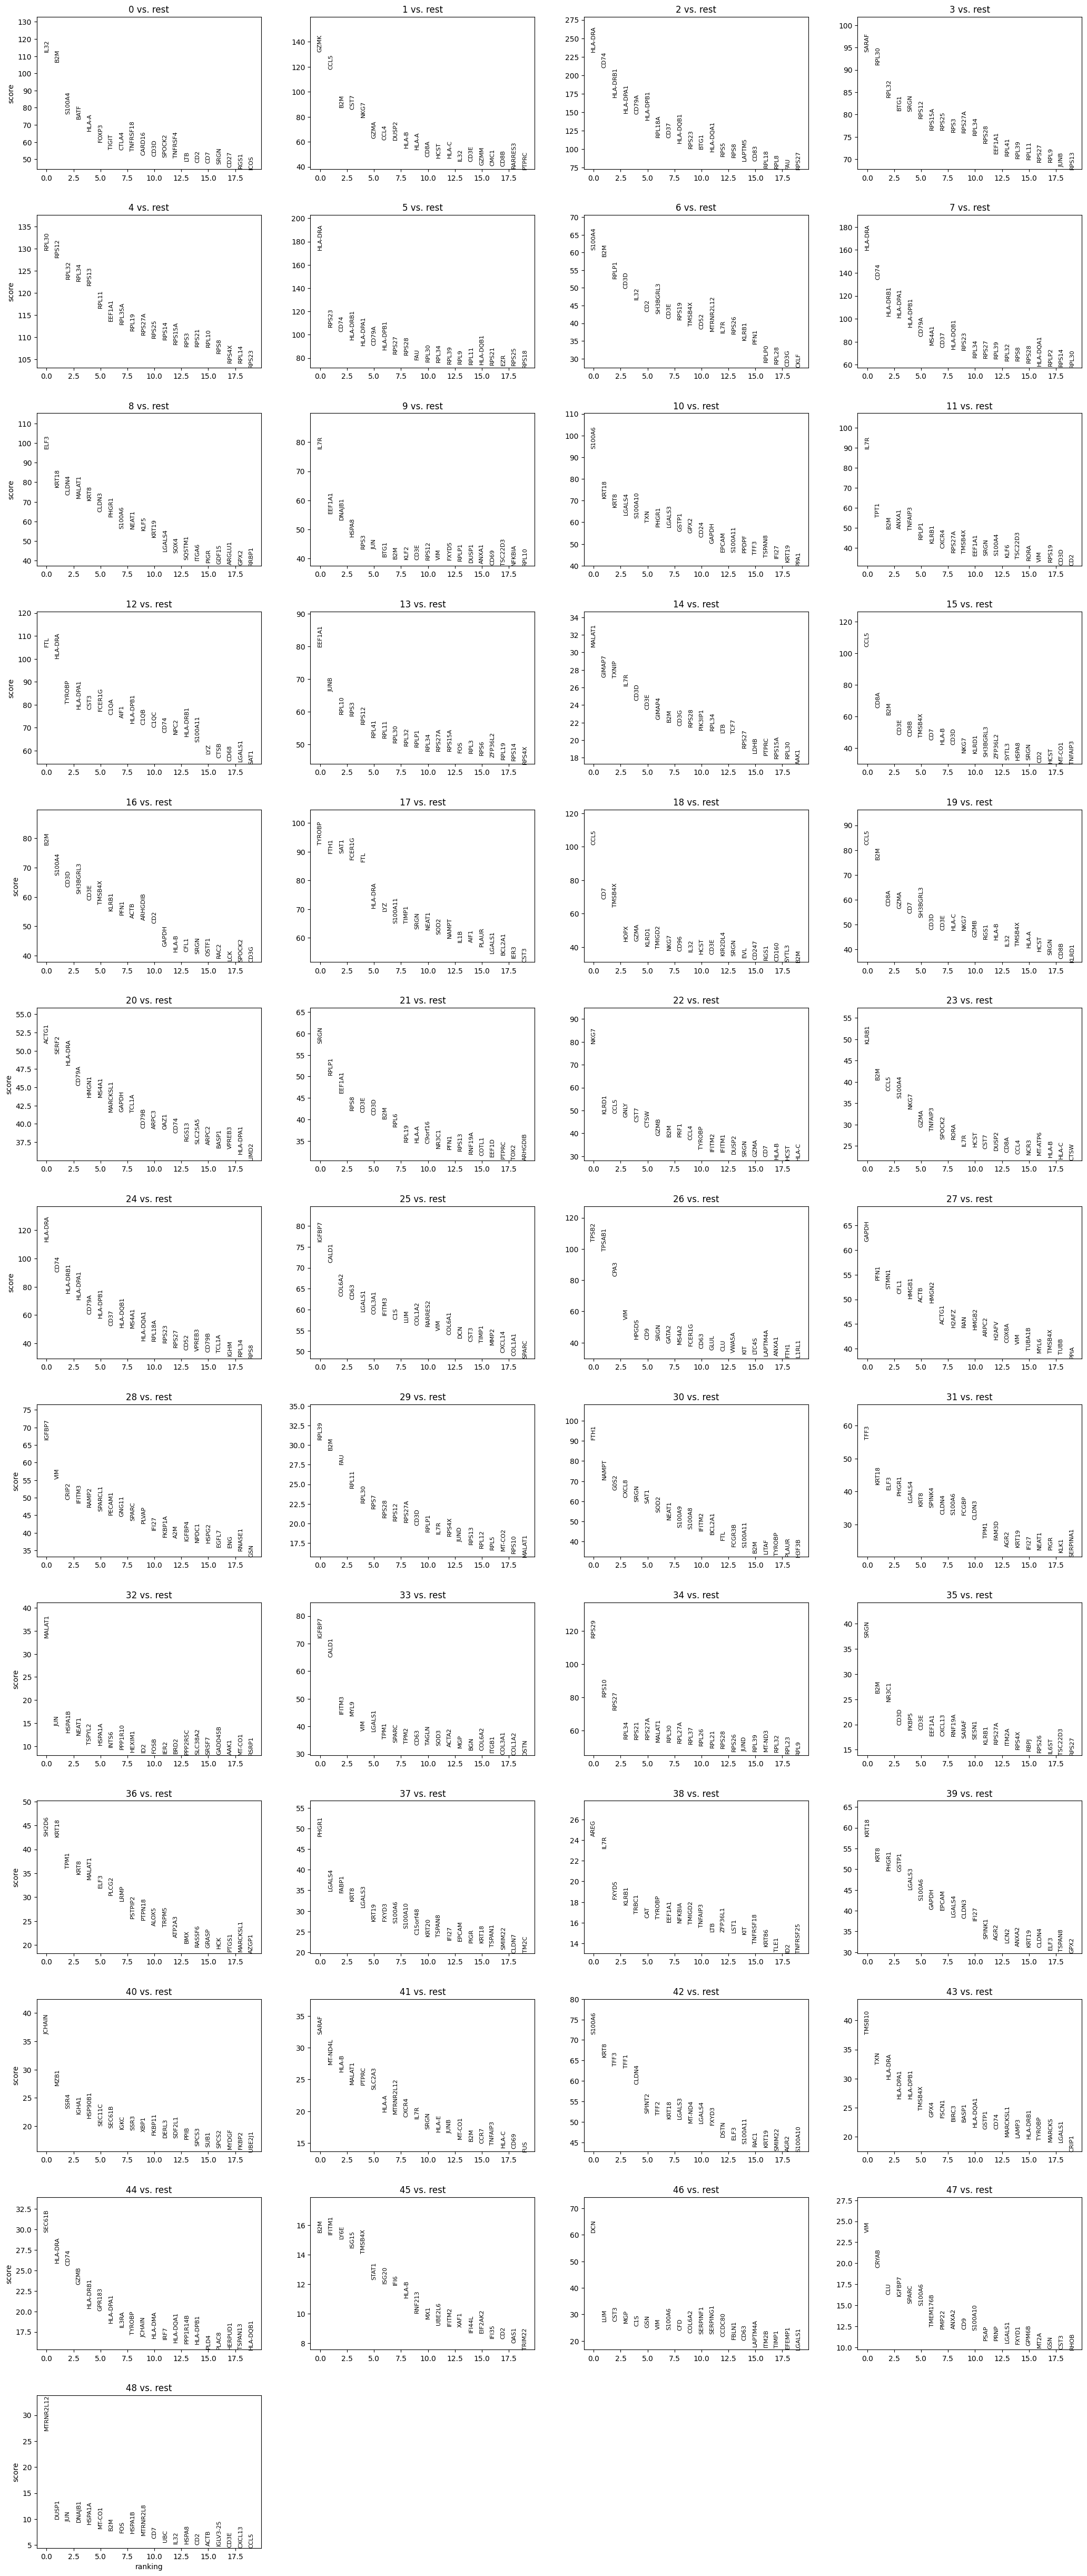

In [7]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [9]:
ncd4=adata[(adata.obs['condition'] == 'Tumor') & 
    (adata.obs['Cell_Type'].isin(['CD4+ T Cells']))].copy()
ncd4

AnnData object with n_obs × n_vars = 11933 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap', 'Cell_Type_colors', 'location_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

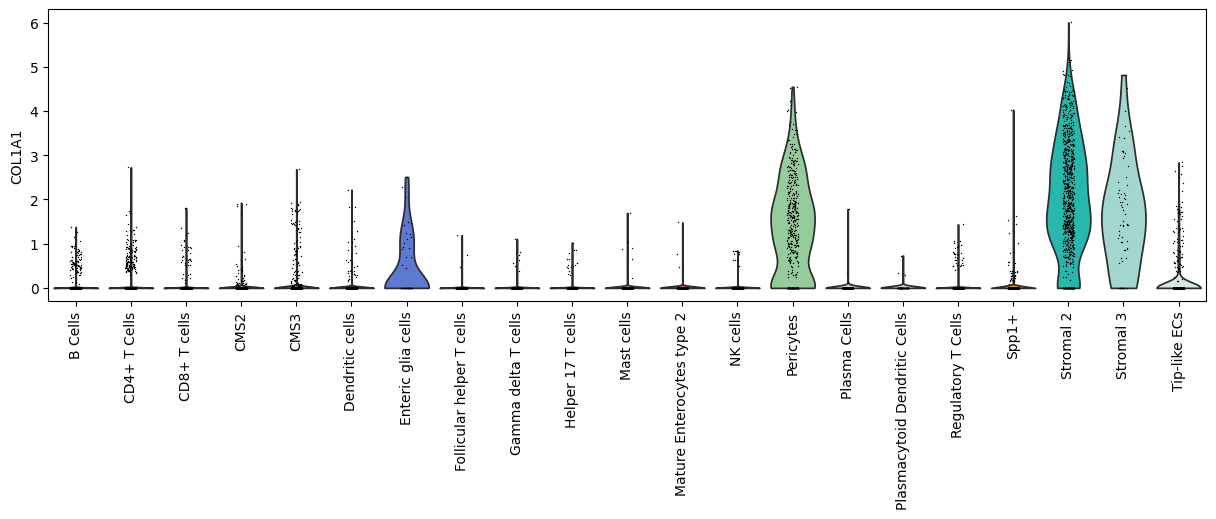

In [38]:
#fibroblats
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["COL1A1"], groupby="Cell_Type", rotation=90, )

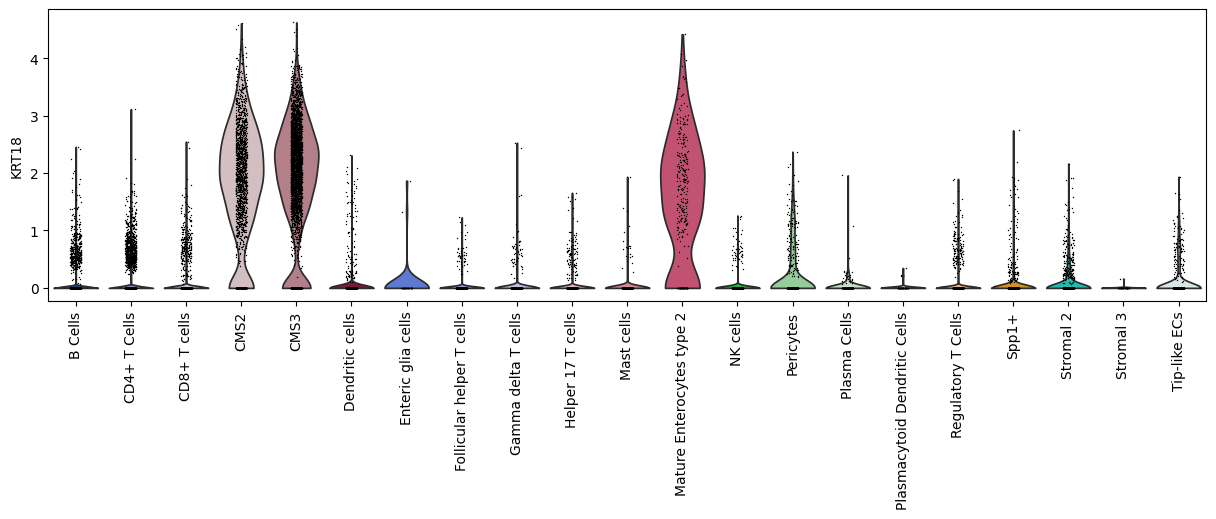

In [35]:
#epithelial cells
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["KRT18"], groupby="Cell_Type", rotation=90, )

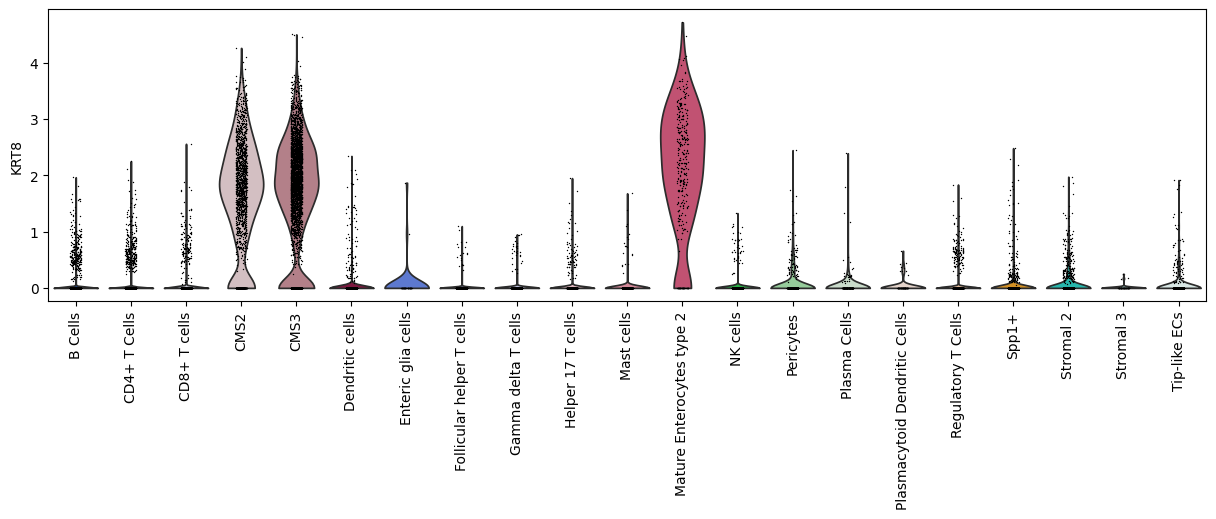

In [36]:
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["KRT8"], groupby="Cell_Type", rotation=90, )

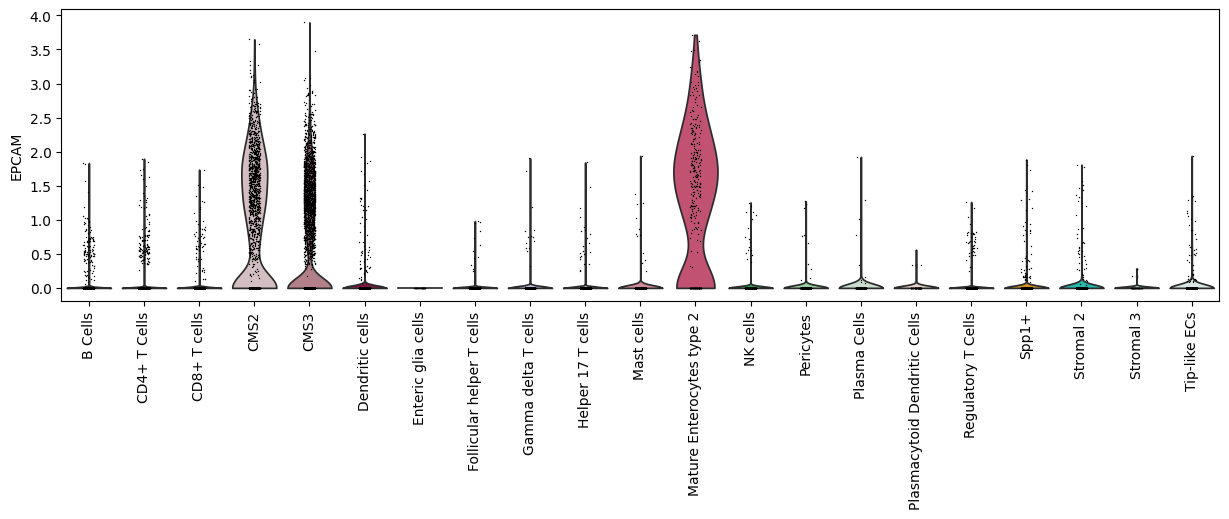

In [37]:
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["EPCAM",], groupby="Cell_Type", rotation=90, )

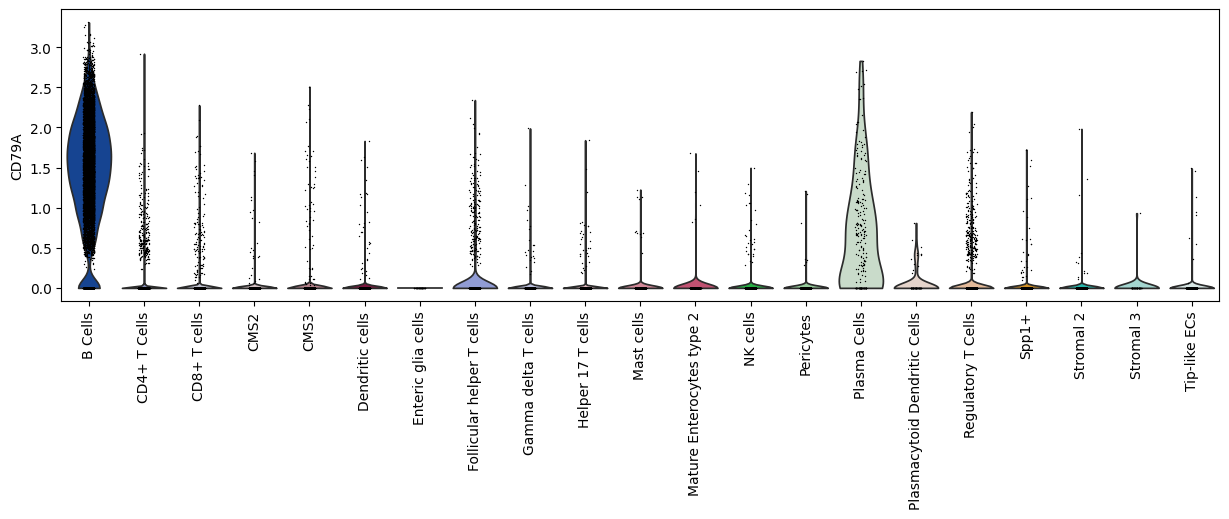

In [34]:
#B cells
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["CD79A"], groupby="Cell_Type", rotation=90, )

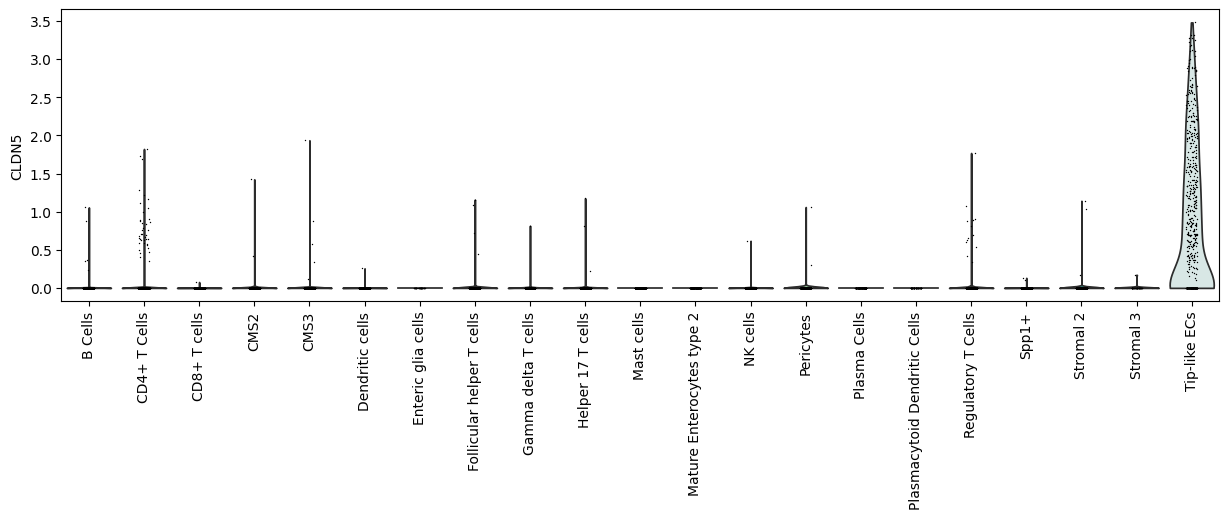

In [33]:
#endothelial cells
with plt.rc_context({"figure.figsize": (12, 4)}):
    sc.pl.violin(adata, ["CLDN5"], groupby="Cell_Type", rotation=90, )

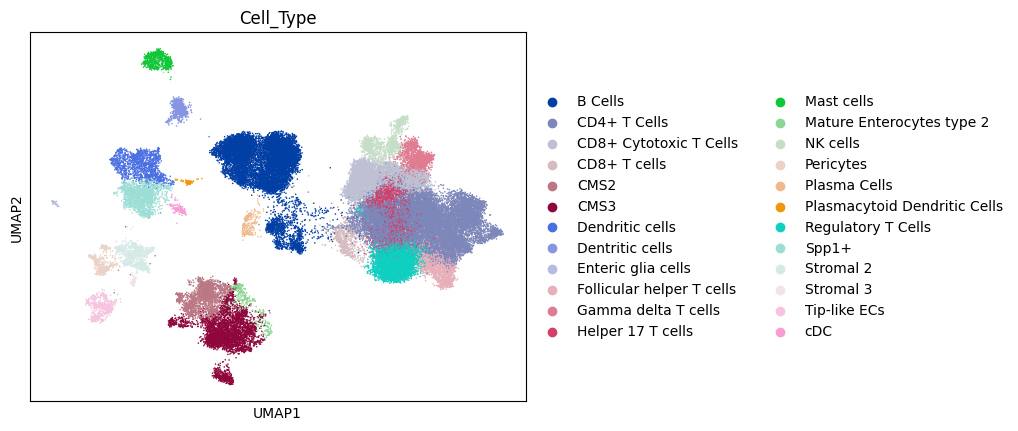

In [4]:
sc.pl.umap(adata, color = ['Cell_Type'], s = 5)

In [5]:
adata.obs


,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,low_label,low_score,_scvi_batch,_scvi_labels,overcluster,low_major,Cell_Type
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000,T follicular helper cells,0.103311,0,0,14,CD4+ T cells,CD4+ T Cells
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000,Unknown,0.236022,0,0,11,CD4+ T cells,CD4+ T Cells
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000,Unknown,0.400460,0,0,36,CMS3,CMS3
711_AAACCCAGTCTCGCGA-1,711,Tumor,Right,579,579,6.363028,860.0,6.758094,23.255814,15.465117,6.395349,0.000000,Tip-like ECs,0.966648,0,0,28,Tip-like ECs,Tip-like ECs
711_AAACGAAGTTATCTTC-1,711,Tumor,Right,1384,1384,7.233455,2629.0,7.874739,19.246862,8.178015,15.405098,0.000000,gamma delta T cells,0.993837,0,0,15,CD8+ T cells,CD8+ Cytotoxic T Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTCAAACACCT-1,706,Tumor,Left,1815,1815,7.504392,4944.0,8.506132,21.318770,1.961974,21.318771,0.020227,CD8+ T cells,0.999997,0,0,1,CD8+ T cells,CD8+ Cytotoxic T Cells
706_TTTGGTTCAACGGGTA-1,706,Tumor,Left,909,909,6.813445,3528.0,8.168770,34.722222,0.368481,25.368483,0.000000,Pro-inflammatory,0.549964,0,0,12,SPP1+,Spp1+
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237,Stromal 2,0.961222,0,0,25,Stromal 2,Stromal 2
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000,CMS2,0.978673,0,0,10,CMS2,CMS2


In [34]:
np.max(adata.X)

7.0915685

In [35]:
np.max(adata.layers['counts'])

10037.0

In [6]:
# let's take a look at abundances of different cell types
adata.obs["Cell_Type"].value_counts()

Cell_Type
CD4+ T Cells                    17357
B Cells                         10774
CD8+ Cytotoxic T Cells           6055
Regulatory T Cells               3907
CMS3                             3876
Helper 17 T cells                2377
CMS2                             1792
Spp1+                            1634
Follicular helper T cells        1486
Dendritic cells                  1362
Gamma delta T cells              1336
NK cells                         1320
Stromal 2                         897
Mast cells                        642
CD8+ T cells                      621
Tip-like ECs                      610
Dentritic cells                   573
Pericytes                         457
Mature Enterocytes type 2         326
Plasma Cells                      240
cDC                               170
Plasmacytoid Dendritic Cells       89
Stromal 3                          65
Enteric glia cells                 49
Name: count, dtype: int64

In [7]:
print(f"Conditions: {adata.obs['condition'].value_counts().to_dict()}")
print(f"Locations: {adata.obs['location'].value_counts().to_dict()}")
print(f"Cell types: {len(adata.obs['Cell_Type'].unique())} types")

Conditions: {'Tumor': 43640, 'Normal': 14375}
Locations: {'Left': 32344, 'Right': 25671}
Cell types: 24 types


In [4]:
num_tot_cells= adata.obs.groupby(['samples']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.condition))
num_tot_cells

{'706': 2988,
 '707': 2256,
 '708': 4036,
 '709': 4392,
 '710': 2918,
 '711': 3197,
 'B_cac4': 2061,
 'B_cac6': 462,
 'B_cac7': 744,
 'B_cac10': 2072,
 'B_cac11': 4135,
 'B_cac14': 4180,
 'B_cac15': 721,
 'T_cac1': 651,
 'T_cac2': 724,
 'T_cac3': 554,
 'T_cac4': 1487,
 'T_cac5': 160,
 'T_cac6': 1311,
 'T_cac7': 812,
 'T_cac8': 483,
 'T_cac9': 1431,
 'T_cac10': 585,
 'T_cac11': 2429,
 'T_cac12': 3257,
 'T_cac13': 1939,
 'T_cac14': 3483,
 'T_cac15': 3364,
 'T_cac16': 1183}

In [5]:
cell_type_counts = adata.obs.groupby(['samples', 'condition', 'Cell_Type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index() #only rows with atleast one cell
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,samples,condition,Cell_Type,location
0,706,Tumor,B Cells,663
1,706,Tumor,CD4+ T Cells,455
2,706,Tumor,CD8+ Cytotoxic T Cells,276
3,706,Tumor,CD8+ T cells,28
4,706,Tumor,CMS2,304
...,...,...,...,...
561,T_cac16,Tumor,Regulatory T Cells,75
562,T_cac16,Tumor,Spp1+,23
563,T_cac16,Tumor,Stromal 2,2
564,T_cac16,Tumor,Tip-like ECs,4


In [6]:
cell_type_counts['total_cells'] = cell_type_counts.samples.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.location / cell_type_counts.total_cells

cell_type_counts

,samples,condition,Cell_Type,location,total_cells,frequency
0,706,Tumor,B Cells,663,2988,0.221888
1,706,Tumor,CD4+ T Cells,455,2988,0.152276
2,706,Tumor,CD8+ Cytotoxic T Cells,276,2988,0.092369
3,706,Tumor,CD8+ T cells,28,2988,0.009371
4,706,Tumor,CMS2,304,2988,0.101740
...,...,...,...,...,...,...
561,T_cac16,Tumor,Regulatory T Cells,75,1183,0.063398
562,T_cac16,Tumor,Spp1+,23,1183,0.019442
563,T_cac16,Tumor,Stromal 2,2,1183,0.001691
564,T_cac16,Tumor,Tip-like ECs,4,1183,0.003381


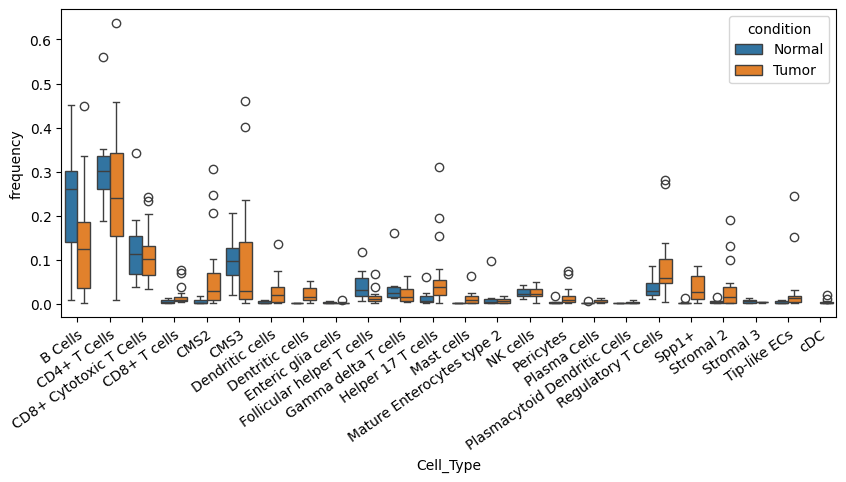

In [7]:
plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'Cell_Type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

In [21]:
# FUNCTION: ENHANCED HEATMAP VISUALIZATION
# =========================================================================
def plot_de_heatmap_enhanced(de_results, 
                           comparison_name,
                           top_n=40, 
                           lfc_threshold=0.5, 
                           significance_threshold=0.9,
                           figsize=(14, 10),
                           save_plot=True):
    """
    Create comprehensive heatmap for DE results
    
    Parameters:
    - de_results: DataFrame from scVI differential expression
    - comparison_name: String describing the comparison (for titles/filenames)
    - top_n: Number of top genes to display
    - lfc_threshold: Minimum absolute log fold change to consider
    - significance_threshold: Minimum P(DE) to consider significant
    - figsize: Figure size tuple
    - save_plot: Whether to save the plot as PNG
    """
    
    print(f"\n--- Creating heatmap for: {comparison_name} ---")
    
    # Filter for significant genes based on both LFC and probability
    significant_mask = (
        (abs(de_results['lfc_mean']) >= lfc_threshold) & 
        (de_results['proba_de'] >= significance_threshold)
    )
    significant_genes = de_results[significant_mask].copy()
    
    print(f"Total genes analyzed: {len(de_results)}")
    print(f"Significant genes (|LFC| >= {lfc_threshold}, P(DE) >= {significance_threshold}): {len(significant_genes)}")
    
    if len(significant_genes) == 0:
        print("⚠️  No significant genes found with current thresholds!")
        print("Trying with relaxed thresholds...")
        # Relax thresholds if no genes found
        significant_genes = de_results[
            (abs(de_results['lfc_mean']) >= 0.25) & 
            (de_results['proba_de'] >= 0.7)
        ].copy()
        print(f"Relaxed criteria found: {len(significant_genes)} genes")
    
    if len(significant_genes) == 0:
        print("❌ Still no significant genes found. Skipping heatmap.")
        return None, None
    
    # Sort by significance and absolute log fold change
    significant_genes['abs_lfc'] = abs(significant_genes['lfc_mean'])
    significant_genes = significant_genes.sort_values(
        ['proba_de', 'abs_lfc'], 
        ascending=[False, False]
    )
    
    # Select top upregulated and downregulated genes
    upregulated = significant_genes[significant_genes['lfc_mean'] > 0]
    downregulated = significant_genes[significant_genes['lfc_mean'] < 0]
    
    # Balance the selection
    n_up = min(len(upregulated), top_n // 2)
    n_down = min(len(downregulated), top_n // 2)
    
    # If one category has fewer genes, take more from the other
    if n_up < top_n // 2:
        n_down = min(len(downregulated), top_n - n_up)
    elif n_down < top_n // 2:
        n_up = min(len(upregulated), top_n - n_down)
    
    selected_up = upregulated.head(n_up)
    selected_down = downregulated.head(n_down)
    
    genes_to_plot = pd.concat([selected_up, selected_down])
    
    print(f"Selected for plotting: {len(selected_up)} upregulated, {len(selected_down)} downregulated")
    
    # Create figure with custom layout
    fig = plt.figure(figsize=figsize)
    
    # Define grid layout: main heatmap, colorbar, and two annotation rows
    gs = fig.add_gridspec(4, 2, 
                         height_ratios=[3, 0.5, 0.5, 0.1], 
                         width_ratios=[20, 1],
                         hspace=0.05, wspace=0.02)
    
    # Main heatmap axis
    ax_main = fig.add_subplot(gs[0, 0])
    
    # Prepare data for main heatmap (Log Fold Change)
    lfc_data = genes_to_plot['lfc_mean'].values.reshape(1, -1)
    
    # Create custom colormap: blue (down) -> white (neutral) -> red (up)
    colors = ['#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0', 
              '#f7f7f7', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']
    cmap = LinearSegmentedColormap.from_list('custom_RdBu', colors, N=256)
    
    # Plot main heatmap
    vmax = max(abs(genes_to_plot['lfc_mean'].min()), abs(genes_to_plot['lfc_mean'].max()))
    vmax = min(vmax, 3)  # Cap at 3 for visualization
    
    im_main = ax_main.imshow(lfc_data, cmap=cmap, aspect='auto', 
                            vmin=-vmax, vmax=vmax)
    
    # Set main heatmap properties
    ax_main.set_xticks(range(len(genes_to_plot)))
    ax_main.set_xticklabels(genes_to_plot.index, rotation=45, ha='right', fontsize=8)
    ax_main.set_yticks([0])
    ax_main.set_yticklabels(['Log₂FC'], fontsize=10)
    ax_main.set_title(f'Differential Expression Analysis\n{comparison_name}', 
                     fontsize=14, fontweight='bold', pad=20)
    
    # Add colorbar for main heatmap
    cbar_ax = fig.add_subplot(gs[0, 1])
    cbar = plt.colorbar(im_main, cax=cbar_ax)
    cbar.set_label('Log₂ Fold Change', rotation=270, labelpad=20, fontsize=10)
    
    # Second row: Probability of DE
    ax_prob = fig.add_subplot(gs[1, 0])
    prob_data = genes_to_plot['proba_de'].values.reshape(1, -1)
    
    im_prob = ax_prob.imshow(prob_data, cmap='viridis', aspect='auto', vmin=0, vmax=1)
    ax_prob.set_xticks(range(len(genes_to_plot)))
    ax_prob.set_xticklabels([])  # No x-labels for middle plot
    ax_prob.set_yticks([0])
    ax_prob.set_yticklabels(['P(DE)'], fontsize=10)
    
    # Colorbar for probability
    cbar_ax2 = fig.add_subplot(gs[1, 1])
    cbar2 = plt.colorbar(im_prob, cax=cbar_ax2)
    cbar2.set_label('P(DE)', rotation=270, labelpad=15, fontsize=10)
    
    # Third row: Bayes Factor or Mean Expression
    ax_third = fig.add_subplot(gs[2, 0])
    
    if 'bayes_factor' in genes_to_plot.columns:
        third_data = genes_to_plot['bayes_factor'].values.reshape(1, -1)
        # Log transform Bayes factors for better visualization
        third_data = np.log10(third_data + 1)
        im_third = ax_third.imshow(third_data, cmap='plasma', aspect='auto')
        ylabel = 'log₁₀(BF)'
        cbar_label = 'log₁₀(Bayes Factor)'
    else:
        # Use difference in raw means as alternative
        if 'raw_mean1' in genes_to_plot.columns and 'raw_mean2' in genes_to_plot.columns:
            third_data = (genes_to_plot['raw_mean1'] - genes_to_plot['raw_mean2']).values.reshape(1, -1)
            im_third = ax_third.imshow(third_data, cmap='coolwarm', aspect='auto')
            ylabel = 'Δ Expression'
            cbar_label = 'Mean Expression Difference'
        else:
            # Use LFC standard deviation
            third_data = genes_to_plot['lfc_std'].values.reshape(1, -1)
            im_third = ax_third.imshow(third_data, cmap='hot', aspect='auto')
            ylabel = 'LFC Std'
            cbar_label = 'LFC Standard Deviation'
    
    ax_third.set_xticks(range(len(genes_to_plot)))
    ax_third.set_xticklabels(genes_to_plot.index, rotation=45, ha='right', fontsize=8)
    ax_third.set_yticks([0])
    ax_third.set_yticklabels([ylabel], fontsize=10)
    
    # Colorbar for third row
    cbar_ax3 = fig.add_subplot(gs[2, 1])
    cbar3 = plt.colorbar(im_third, cax=cbar_ax3)
    cbar3.set_label(cbar_label, rotation=270, labelpad=20, fontsize=10)
    
    # Add summary statistics as text
    summary_text = (f"Total genes: {len(de_results)} | "
                   f"Significant: {len(significant_genes)} | "
                   f"Upregulated: {len(selected_up)} | "
                   f"Downregulated: {len(selected_down)}")
    
    fig.text(0.5, 0.02, summary_text, ha='center', fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
    
    plt.tight_layout()
    
    # Save plot if requested
    if save_plot:
        filename = f"DE_heatmap_{comparison_name.replace(' ', '_').replace('/', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✓ Heatmap saved as: {filename}")
    
    return fig, genes_to_plot
